In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import json
from matplotlib.lines import Line2D

In [2]:
#Read and load the json file
with open ("C:/Users/adere/Downloads/Global Roads Open Access Data Set.json.geojson") as file:
    road = json.load(file)

In [10]:
#create GeoDataFrame from the road data
Global_road = gpd.GeoDataFrame.from_features(road['features'])

In [11]:
Global_road.head(2)

,geometry,OBJECTID,ONME,FCLASS,SRFTPE,ISSEASONAL,CURNTPRAC,GDWTHRPRAC,SUM_LENGTH_KM
0,"LINESTRING (-66.82451 17.98029, -66.82455 17.9...",1,None,0,0.0,0.0,NaN,NaN,16686.65607
1,"LINESTRING (-66.62012 17.98131, -66.62126 17.9...",2,None,0,0.0,0.0,NaN,NaN,16686.65607


In [12]:
#Define a mapping function for road data
def map_road_to_sdg(x):
    if x['FCLASS'] != '':
        return('SDG 11 - Sustainable Cities and Communities')

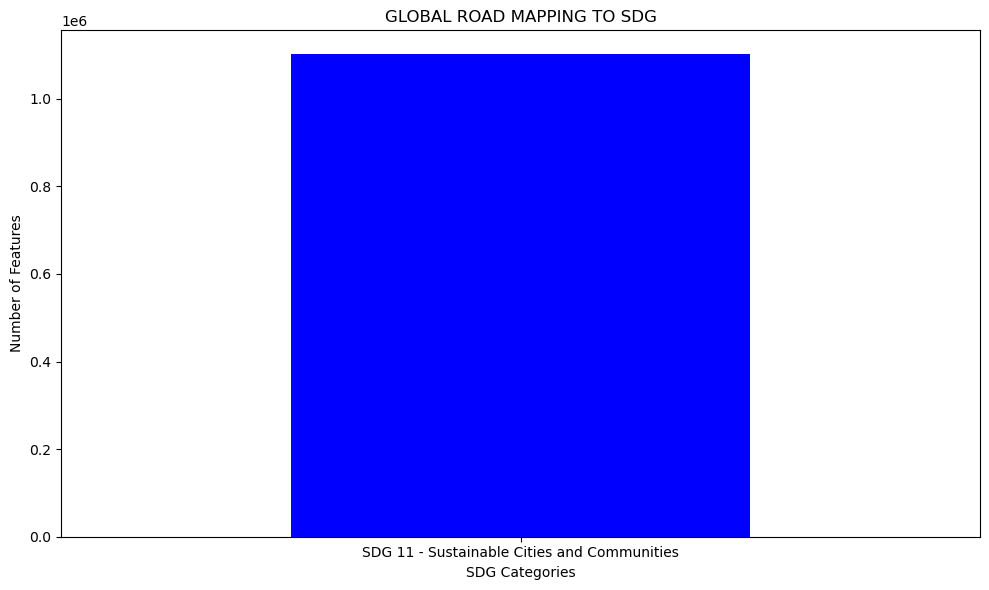

In [13]:
# Apply the mapping function to the dataset
Global_road['Sustainable Cities and Communities'] = Global_road.apply(map_road_to_sdg, axis=1)

# Create a bar chart to visualize the mapped data
sdg_counts = Global_road['Sustainable Cities and Communities'].value_counts()
plt.figure(figsize=(10, 6))
sdg_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('GLOBAL ROAD MAPPING TO SDG')
plt.xlabel('SDG Categories')
plt.ylabel('Number of Features')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
Global_road['SRFTPE'].value_counts()

SRFTPE
0.0    966028
1.0    101677
2.0      8457
3.0      7504
Name: count, dtype: int64

In [15]:
# Sample road data with 'SRFTPE' values as floats
Global_road = [{'SRFTPE': 0.0}, {'SRFTPE': 1.0}, {'SRFTPE': 2.0}, {'SRFTPE':3.0}]

# Define the mapping function
def map_road_to_sdg(x):
    if x['SRFTPE'] == 0.0:
        return 'Not mapped'
    else:
        return 'SDG 11 - Sustainable Cities and Communities'

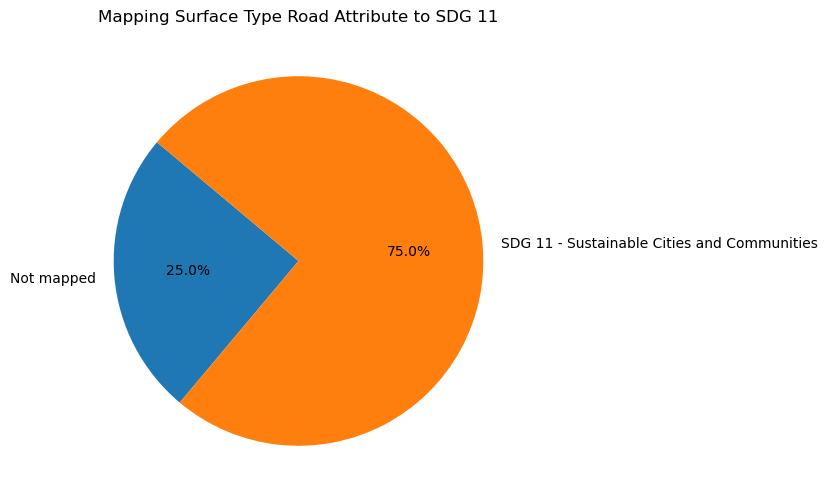

In [16]:
# Apply the mapping function to the road data
mapped_data = [map_road_to_sdg(item) for item in Global_road]

# Count the occurrences of each category
counts = {}
for item in mapped_data:
    counts[item] = counts.get(item, 0) + 1

# Extract labels and values for the pie chart
labels = list(counts.keys())
values = list(counts.values())

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Mapping Surface Type Road Attribute to SDG 11")
plt.show()

**Paved**: Paved roads are typically associated with urban and suburban areas, and they contribute to safer and more accessible transportation in cities. The paved road entry is relevant to SDG 11 as they can improve mobility and accessibility in urban areas.

**Gravel**: Gravel roads may also be relevant, especially in areas where paving is not practical due to various reasons. Improving gravel roads can enhance transportation infrastructure in rural or peri-urban areas, which aligns with the goal of making settlements more accessible and sustainable.

**Dirt/Sand**: Dirt or sand roads may be relevant in rural or informal settlement contexts. Enhancing these roads can improve access to essential services in such areas, which is a part of making settlements more inclusive and sustainable.

**Unspecified**: The "Unspecified" category doesn't provide specific information about the road material, so its relevance to SDG 11 would depend on the actual road material used.

In [17]:
#Read and load json file
with open("C:/Users/adere/Downloads/IPCC_ClimateZoneMap_Vector.geojson") as file:
    climate = json.load(file)

In [18]:
#create GeoDataFrame from the climate data
Climate_data= gpd.GeoDataFrame.from_features(climate['features'])

In [19]:
Climate_data.head(2)

,geometry,CLASS_NAME
0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...",0
1,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...",0


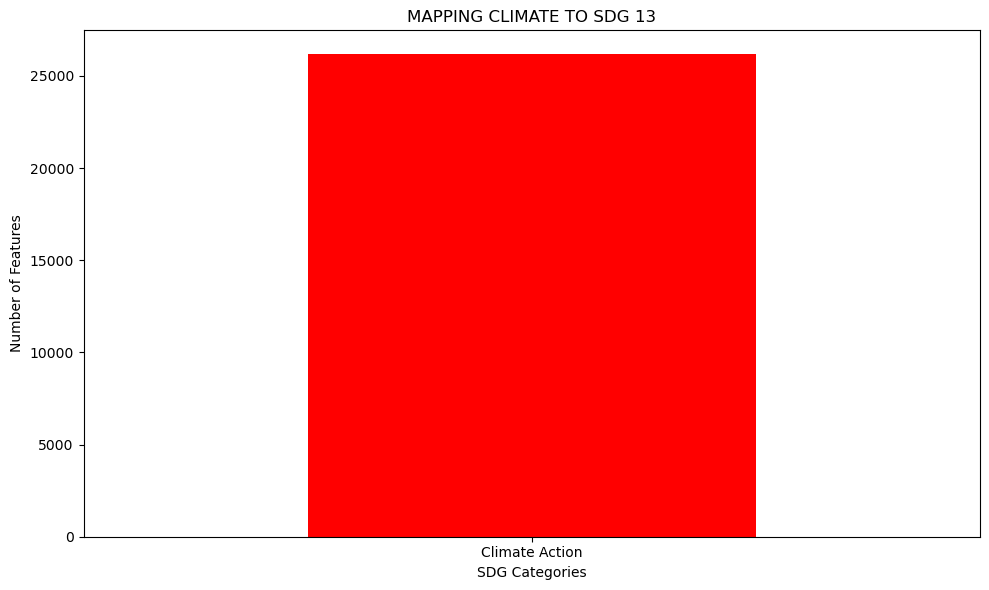

In [20]:
# Define the mapping function for climate
def map_climate_to_sdg(x):
    if x['CLASS_NAME'] != '':
        return 'Climate Action'

# Apply the mapping function to the dataset
Climate_data['Climate Action'] = Climate_data.apply(map_climate_to_sdg, axis=1)

# Create a bar chart to visualize the mapped data
count_sdg = Climate_data['Climate Action'].value_counts()
plt.figure(figsize=(10, 6))
count_sdg.plot(kind='bar', color=['red'])
plt.title('MAPPING CLIMATE TO SDG 13')
plt.xlabel('SDG Categories')
plt.ylabel('Number of Features')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [21]:
#read the file
file_path = r"C:/Users/adere/Downloads/WDPA_WDOECM_wdpa_gdb_polygons/WDPA_WDOECM_wdpa_gdb_polygons.shp"

In [22]:
## Read geospatial data from the specified file path using GeoPandas
protected_area = gpd.read_file(file_path)

In [23]:
protected_area.head(2)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,10715.0,10715,1,Kronotskiy,Kronotskiy,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,840,RU-KAM,RUS,RUS,Not Applicable,Not Applicable,"MULTIPOLYGON (((160.49655 55.17709, 160.49907 ..."
1,209777.0,209777_E,1,Sarali Land between Rivers / Great Volzhsko-Ka...,Great Volzhsko-Kamsky,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,840,RU-TA,RUS,RUS,Not Applicable,Not Applicable,"POLYGON ((49.30487 55.36806, 49.30433 55.37184..."


In [30]:
protected_area['MARINE'].value_counts()

MARINE
0    228942
1     11223
Name: count, dtype: int64

In [39]:
protected_area['GIS_M_AREA'].value_counts()

GIS_M_AREA
0.000000     221916
0.046104          5
0.001419          3
0.005168          3
0.666337          3
              ...  
6.686881          1
14.291963         1
76.304367         1
0.078364          1
0.004578          1
Name: count, Length: 17703, dtype: int64

In [31]:
# Define the mapping function for climate
def map_protected_area_to_sdg(x):
    if x['MARINE'] == 0:
        return 'Not mapped'
    else:
        return 'SDG 13-Climate Action'


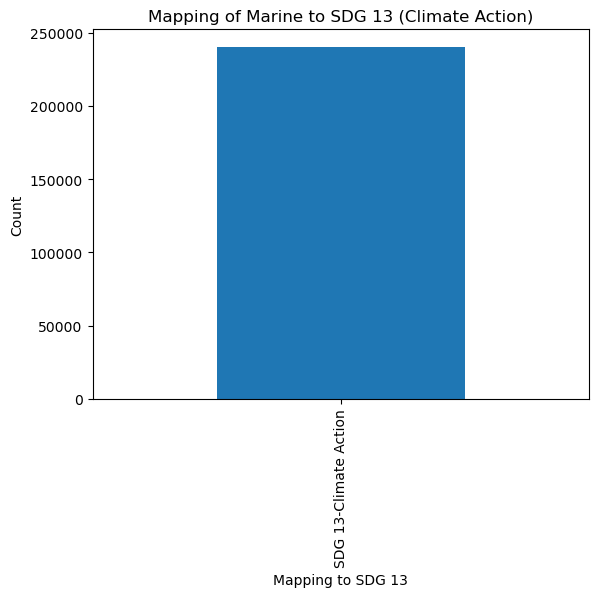

In [36]:
# Apply your mapping function to create a new column 'SDG_Mapping'
protected_area['SDG_Mapping'] = protected_area.apply(map_prote7cted_area_to_sdg, axis=1)

# Count the occurrences of each mapping
mapping_counts = protected_area['SDG_Mapping'].value_counts()

# Create a bar chart
mapping_counts.plot(kind='bar')
plt.xlabel('Mapping to SDG 13')
plt.ylabel('Count')
plt.title('Mapping of Marine to SDG 13 (Climate Action)')
plt.show()

In [ ]:
# Define the mapping function for climate
def map_protected_area_to_sdg(x):
    if x['MARINE'] == 0:
        return 'Not mapped'
    else:
        return 'SDG 13-Climate Action'